In [1]:
# Autoreload
%load_ext autoreload
%autoreload 2

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Analyze Model

### Import libraries

In [2]:
# Data manipulation and analysis
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Machine Learning
from xgboost import XGBClassifier
from xgboost import plot_tree

# Utils
from bimbo.xgboost_models import *

In [3]:
# load model from file

loaded_model = load_model("model_3")

Loaded model from: pima.pickle.dat


### Plot a Single XGBoost Decision Tree

**brew install graphviz**
`pip install graphviz`

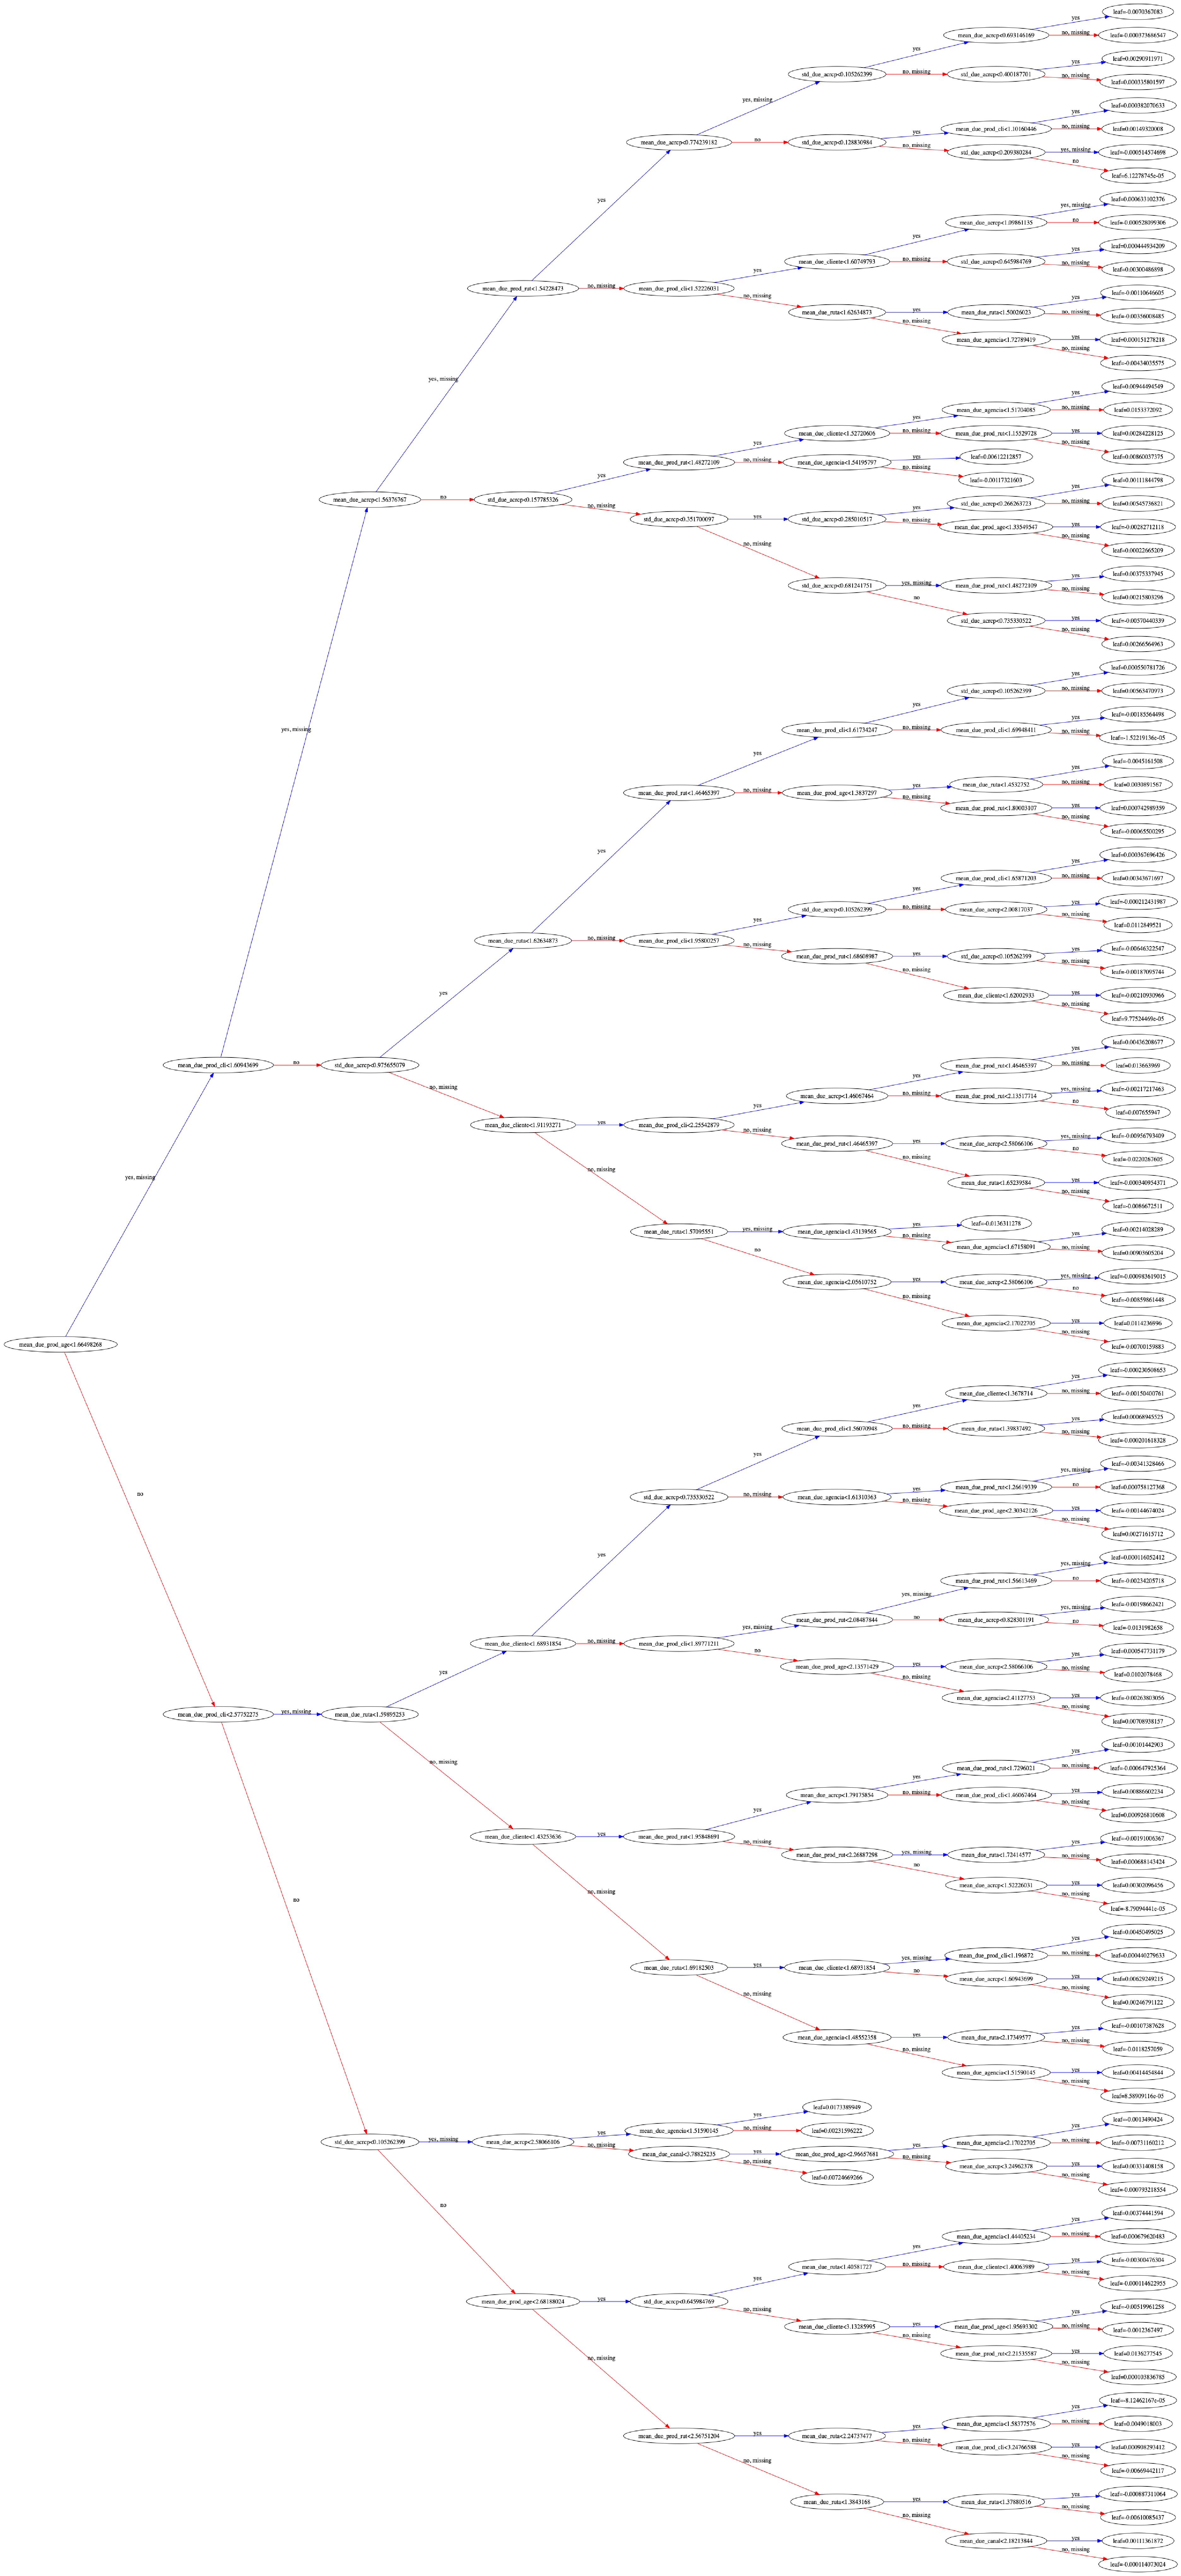

In [4]:
# plot the nth boosted tree in the sequence as follows:

n=5

plot_tree(loaded_model,
          num_trees=130,
          rankdir='LR')

fig = plt.gcf()
fig.set_size_inches(150, 150)
fig.savefig('../images/boosted_tree_1.png', dpi=100)
plt.show()

### Manually Plot Feature Importance

In [5]:
# print feature importance
print(loaded_model.feature_importances_)

[0.0017442  0.00650235 0.00179701 0.01406202 0.0257995  0.04434793
 0.52263707 0.00680197 0.19161372 0.00181002 0.00543731 0.17744695]


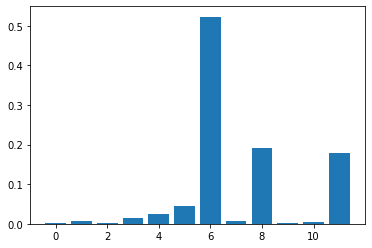

In [6]:
plt.bar(range(len(loaded_model.feature_importances_)), loaded_model.feature_importances_)
plt.show()

### Using the Built-in XGBoost Feature Importance Plot

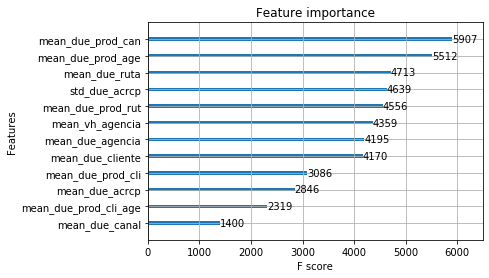

In [7]:
from xgboost import plot_importance

# plot feature importance
plot_importance(loaded_model)
plt.show()

### Feature Selection with XGBoost Feature Importance Scores

In [8]:
# Import data
processed_val_df = pd.read_csv('../data/processed_val.csv')

In [9]:
X = processed_val_df.drop('log_demanda_uni_equil', axis=1)
y = processed_val_df['log_demanda_uni_equil']

In [10]:
processed_val_df.head(3)

,Demanda_uni_equil,log_demanda_uni_equil,mean_due_agencia,mean_due_canal,mean_due_ruta,mean_due_cliente,mean_due_prod_age,mean_due_prod_rut,mean_due_prod_cli,mean_due_prod_can,mean_due_prod_cli_age,mean_vh_agencia,std_due_acrcp,mean_due_acrcp
0,1,0.693147,2.010012,1.996967,2.08378,1.719464,1.587694,1.556331,1.599232,1.512998,1.599232,4.113977,0.165949,1.599232
1,2,1.098612,2.010012,1.996967,2.08378,1.719464,1.680625,1.553152,1.212066,1.601887,1.212066,4.113977,0.320511,1.212066
2,2,1.098612,2.010012,1.996967,2.08378,1.719464,1.931563,1.803948,1.746179,1.819226,1.746179,4.113977,0.500848,1.746179


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y,
        test_size=0.5, random_state=42)

X_train.drop(['Demanda_uni_equil'], axis=1, inplace=True)
X_val.drop(['Demanda_uni_equil'], axis=1, inplace=True)

In [12]:
# make predictions for test data and evaluate
predictions = loaded_model.predict(X_val)

In [13]:
final_predictions = np.expm1(predictions).round().astype(int)
final_y_val = np.expm1(y_val).round().astype(int)

In [14]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(final_y_val, final_predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 26.46%


In [15]:
accuracy = accuracy_score(final_y_val, np.full(len(final_predictions), 2))
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 20.12%


Giving a prediction filled with 2 gives an accuracy of **20.12%**, vs now an accuracy of (**26.38%** in model 2) **26.46%**.

### Evaluate XGBoost Models With Learning Curves

In [16]:
results = loaded_model.evals_result()
print(results)

{'validation_0': {'mae': [1.002175, 0.911814, 0.827924, 0.75743, 0.69684, 0.644149, 0.598904, 0.560572, 0.527434, 0.498803, 0.474844, 0.45447, 0.437521, 0.423039, 0.410511, 0.399857, 0.390889, 0.383541, 0.377164, 0.371809, 0.367313, 0.363556, 0.360331, 0.357678, 0.355519, 0.35356, 0.351907, 0.350403, 0.349179, 0.348211, 0.347334, 0.346512, 0.345849, 0.345253, 0.344664, 0.344168, 0.343763, 0.343374, 0.343028, 0.342751, 0.342512, 0.342288, 0.342082, 0.341882, 0.341709, 0.341564, 0.341434, 0.341321, 0.341225, 0.34112, 0.341039, 0.340972, 0.340887, 0.340791, 0.340728, 0.340659, 0.340579, 0.340522, 0.340496, 0.340437, 0.340392, 0.34034, 0.340285, 0.340251, 0.340196, 0.34015, 0.340088, 0.340031, 0.339982, 0.339949, 0.339912, 0.339877, 0.339843, 0.3398, 0.339772, 0.339739, 0.339668, 0.339639, 0.33961, 0.339573, 0.33953, 0.339489, 0.339475, 0.33945, 0.339413, 0.339374, 0.339344, 0.339317, 0.339284, 0.33925, 0.339244, 0.339211, 0.339202, 0.339169, 0.339137, 0.339114, 0.339094, 0.339086, 0.33905

In [17]:
# evaluate predictions
accuracy = accuracy_score(final_y_val, final_predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0)) 

Accuracy: 26.46%


In [18]:
# retrieve performance metrics
results = loaded_model.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)
x_axis

range(0, 555)

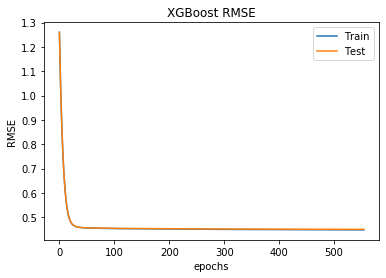

In [19]:
# plot RMSE
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train') 
ax.plot(x_axis, results['validation_1']['rmse'], label='Test') 
ax.legend()
plt.ylabel('RMSE')
plt.xlabel('epochs')
plt.title('XGBoost RMSE')
plt.show()

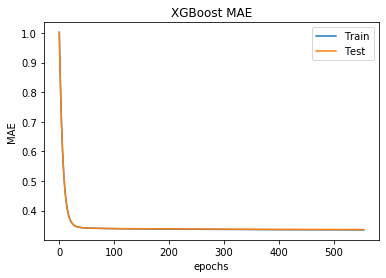

In [21]:
# plot MAE
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['mae'], label='Train') 
ax.plot(x_axis, results['validation_1']['mae'], label='Test') 
ax.legend()
plt.ylabel('MAE')
plt.xlabel('epochs')
plt.title('XGBoost MAE')
plt.show()

### Histogram

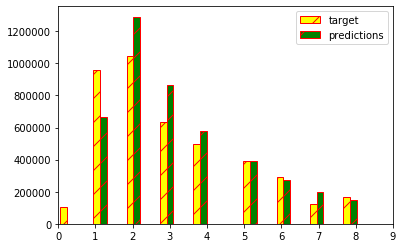

In [69]:
x1 = final_y_val
x2 = pd.Series(final_predictions)
bins = 10000

plt.hist([x1, x2], bins = bins, color = ['yellow', 'green'],
            edgecolor = 'red', hatch = '/', label = ['target', 'predictions'],
            histtype = 'bar')
plt.legend(loc='upper right')
plt.xlim(0, 9)
fig.tight_layout()
plt.show()

In [95]:
final_y_val.value_counts()

2       1047368
1        956377
3        633248
4        497035
5        390554
6        290573
10       201738
8        167185
7        121703
0        103776
9         82926
12        76594
15        69482
20        52843
11        51555
40        40888
14        37817
13        35365
16        32067
18        27543
30        20799
17        18290
25        17776
24        14870
22        13881
19        12854
21        12010
23         9740
26         8760
28         8295
         ...   
841           1
866           1
833           1
827           1
826           1
825           1
823           1
822           1
821           1
865           1
867           1
908           1
883           1
904           1
903           1
898           1
896           1
531           1
887           1
884           1
882           1
868           1
880           1
879           1
878           1
877           1
874           1
529           1
870           1
3866          1
Name: log_demanda_uni_eq

In [35]:
pd.Series(final_predictions).value_counts()

2      1291155
3       868361
1       669001
4       577130
5       391185
6       275485
7       200492
8       149631
9       113004
10       89482
11       72040
12       57010
13       46112
14       38064
15       32082
16       27372
17       23196
18       20176
19       18309
20       15559
21       12794
22       11763
23       11386
24       10827
25        9765
26        8711
27        7586
28        7252
41        7247
40        6401
        ...   
381          1
340          1
269          1
338          1
274          1
414          1
204          1
211          1
212          1
219          1
222          1
228          1
234          1
252          1
264          1
272          1
275          1
330          1
279          1
281          1
291          1
295          1
299          1
300          1
301          1
302          1
309          1
318          1
324          1
430          1
Length: 351, dtype: int64

In [90]:
(abs(pd.Series(final_predictions).value_counts() - final_y_val.value_counts()))\
        .dropna().sort_values(ascending=False)

1      287376.0
2      243787.0
3      235113.0
10     112256.0
0      102232.0
4       80095.0
7       78789.0
15      37400.0
20      37284.0
40      34487.0
9       30078.0
11      20485.0
12      19584.0
8       17554.0
30      15616.0
6       15088.0
13      10747.0
25       8011.0
18       7367.0
80       6558.0
19       5455.0
41       5130.0
17       4906.0
16       4695.0
24       4043.0
39       3423.0
37       3266.0
50       2988.0
38       2716.0
45       2617.0
         ...   
351        11.0
51         10.0
354        10.0
335        10.0
331        10.0
309        10.0
269        10.0
130        10.0
382         9.0
357         9.0
81          9.0
430         9.0
323         9.0
333         9.0
317         9.0
391         8.0
376         8.0
366         8.0
414         8.0
356         7.0
116         7.0
388         7.0
88          7.0
343         6.0
337         6.0
321         5.0
381         4.0
346         4.0
117         1.0
109         1.0
Length: 351, dtype: floa

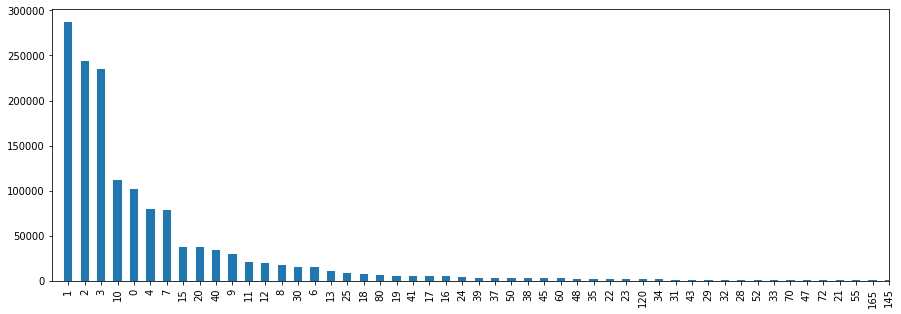

In [85]:
(abs(pd.Series(final_predictions).value_counts() - final_y_val.value_counts()))\
        .dropna().sort_values(ascending=False).plot(kind='bar', figsize=(15,5))
plt.xlim(-1, 50)
plt.show()

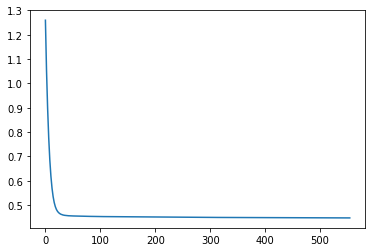

In [86]:
plt.plot(loaded_model.evals_result()['validation_0']['rmse'])

### SHAP

A game theoretic approach to explain the output of any machine learning model.

In [101]:
import shap

In [ ]:
# Tree on XGBoost
explainerXGB = shap.TreeExplainer(loaded_model)
# shap_values_XGB_test = explainerXGB.shap_values(X_test)
# shap_values_XGB_train = explainerXGB.shap_values(X_train)